<img src=".\img\mioti.png">   


# Proyecto Reconocimiento Facial: Reconocimiento de Rostros

<img src="./img/emociones.png" style="width: 800px">

### Objetivos

* En este notebook vamos a realizar el entrenamiento de las imágenes de las personas registradas previamente. Para llevar a cabo esta tarea vamos a utilizar el reconocedor Eigenfaces de openCV del que hablaremos más adelante en el notebook

* Una vez entrenado nuestro modelo pasaremos a realizar un análisis de los resultados obtenidos

### Importación de librerías

* Las librerías que vamos a utilizar son las siguientes:
    * cv2: nos va a proporcionar el reconocedor de imágenes
    * os: para trabajar con directorios
    * numpy: para trabajar con arrays y realizar otras operaciones matemáticas
    * matplotlib: para la visualización de resultados
    * sklearn: para los análisis de resultados
    * itertools: para la construcción de iteradores

In [1]:
#Se importan las librerías necesarias
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
print(cv2.__version__)

4.5.4-dev


### Tratamiento de datos

* En primer lugar vamos a recorrer las carpetas del directorio 'reconocimiento' e iremos introduciendo los nombres de cada persona dentro de una lista de etiquetas. También vamos a introducir en una lista los valores de cada una de las imágenes de cada carpeta
* Cada persona va a ser etiquetada por un número según su orden en el directorio, todas las fotos que se encuentren dentro de su carpeta tendrán esa misma etiqueta como se podrá ver un poco más adelante

In [3]:
data_path='./reconocimiento'
lista_gente=os.listdir(data_path)
print(lista_gente)

['Javier', 'Juan Pedro', 'Ricardo']


In [4]:
labels=[]
faces_data=[]
label=0

#Se van a ir etiquetando las personas
#Se especifica la ruta del directorio
for nombre in lista_gente:
    person_path=data_path+'/'+nombre
    print('leyendo imágenes')
    #Leemos las caras
    for archivo in os.listdir(person_path):
        print('caras: ',nombre+'/'+archivo)
        #Añadimos el valor de la etiqueta a cada imagen
        labels.append(label)
        faces_data.append(cv2.imread(person_path+'/'+archivo,0))
        image=cv2.imread(person_path+'/'+archivo,0)
        cv2.imshow('image',image)
        cv2.waitKey(10)
    label+=1
cv2.destroyAllWindows()        

leyendo imágenes
caras:  Javier/rostro_0.jpg
caras:  Javier/rostro_1.jpg
caras:  Javier/rostro_10.jpg
caras:  Javier/rostro_100.jpg
caras:  Javier/rostro_101.jpg
caras:  Javier/rostro_102.jpg
caras:  Javier/rostro_103.jpg
caras:  Javier/rostro_104.jpg
caras:  Javier/rostro_105.jpg
caras:  Javier/rostro_106.jpg
caras:  Javier/rostro_107.jpg
caras:  Javier/rostro_108.jpg
caras:  Javier/rostro_109.jpg
caras:  Javier/rostro_11.jpg
caras:  Javier/rostro_110.jpg
caras:  Javier/rostro_111.jpg
caras:  Javier/rostro_112.jpg
caras:  Javier/rostro_113.jpg
caras:  Javier/rostro_114.jpg
caras:  Javier/rostro_115.jpg
caras:  Javier/rostro_116.jpg
caras:  Javier/rostro_117.jpg
caras:  Javier/rostro_118.jpg
caras:  Javier/rostro_119.jpg
caras:  Javier/rostro_12.jpg
caras:  Javier/rostro_120.jpg
caras:  Javier/rostro_121.jpg
caras:  Javier/rostro_122.jpg
caras:  Javier/rostro_123.jpg
caras:  Javier/rostro_124.jpg
caras:  Javier/rostro_125.jpg
caras:  Javier/rostro_126.jpg
caras:  Javier/rostro_127.jpg


caras:  Javier/rostro_345.jpg
caras:  Javier/rostro_346.jpg
caras:  Javier/rostro_347.jpg
caras:  Javier/rostro_348.jpg
caras:  Javier/rostro_349.jpg
caras:  Javier/rostro_35.jpg
caras:  Javier/rostro_350.jpg
caras:  Javier/rostro_351.jpg
caras:  Javier/rostro_352.jpg
caras:  Javier/rostro_353.jpg
caras:  Javier/rostro_354.jpg
caras:  Javier/rostro_355.jpg
caras:  Javier/rostro_356.jpg
caras:  Javier/rostro_357.jpg
caras:  Javier/rostro_358.jpg
caras:  Javier/rostro_359.jpg
caras:  Javier/rostro_36.jpg
caras:  Javier/rostro_360.jpg
caras:  Javier/rostro_361.jpg
caras:  Javier/rostro_362.jpg
caras:  Javier/rostro_363.jpg
caras:  Javier/rostro_364.jpg
caras:  Javier/rostro_365.jpg
caras:  Javier/rostro_366.jpg
caras:  Javier/rostro_367.jpg
caras:  Javier/rostro_368.jpg
caras:  Javier/rostro_369.jpg
caras:  Javier/rostro_37.jpg
caras:  Javier/rostro_370.jpg
caras:  Javier/rostro_371.jpg
caras:  Javier/rostro_372.jpg
caras:  Javier/rostro_373.jpg
caras:  Javier/rostro_374.jpg
caras:  Javie

caras:  Juan Pedro/rostro_139.jpg
caras:  Juan Pedro/rostro_14.jpg
caras:  Juan Pedro/rostro_140.jpg
caras:  Juan Pedro/rostro_141.jpg
caras:  Juan Pedro/rostro_142.jpg
caras:  Juan Pedro/rostro_143.jpg
caras:  Juan Pedro/rostro_144.jpg
caras:  Juan Pedro/rostro_145.jpg
caras:  Juan Pedro/rostro_146.jpg
caras:  Juan Pedro/rostro_147.jpg
caras:  Juan Pedro/rostro_148.jpg
caras:  Juan Pedro/rostro_149.jpg
caras:  Juan Pedro/rostro_15.jpg
caras:  Juan Pedro/rostro_150.jpg
caras:  Juan Pedro/rostro_151.jpg
caras:  Juan Pedro/rostro_152.jpg
caras:  Juan Pedro/rostro_153.jpg
caras:  Juan Pedro/rostro_154.jpg
caras:  Juan Pedro/rostro_155.jpg
caras:  Juan Pedro/rostro_156.jpg
caras:  Juan Pedro/rostro_157.jpg
caras:  Juan Pedro/rostro_158.jpg
caras:  Juan Pedro/rostro_159.jpg
caras:  Juan Pedro/rostro_16.jpg
caras:  Juan Pedro/rostro_160.jpg
caras:  Juan Pedro/rostro_161.jpg
caras:  Juan Pedro/rostro_162.jpg
caras:  Juan Pedro/rostro_163.jpg
caras:  Juan Pedro/rostro_164.jpg
caras:  Juan Pedr

caras:  Juan Pedro/rostro_358.jpg
caras:  Juan Pedro/rostro_359.jpg
caras:  Juan Pedro/rostro_36.jpg
caras:  Juan Pedro/rostro_360.jpg
caras:  Juan Pedro/rostro_361.jpg
caras:  Juan Pedro/rostro_362.jpg
caras:  Juan Pedro/rostro_363.jpg
caras:  Juan Pedro/rostro_364.jpg
caras:  Juan Pedro/rostro_365.jpg
caras:  Juan Pedro/rostro_366.jpg
caras:  Juan Pedro/rostro_367.jpg
caras:  Juan Pedro/rostro_368.jpg
caras:  Juan Pedro/rostro_369.jpg
caras:  Juan Pedro/rostro_37.jpg
caras:  Juan Pedro/rostro_370.jpg
caras:  Juan Pedro/rostro_371.jpg
caras:  Juan Pedro/rostro_372.jpg
caras:  Juan Pedro/rostro_373.jpg
caras:  Juan Pedro/rostro_374.jpg
caras:  Juan Pedro/rostro_375.jpg
caras:  Juan Pedro/rostro_376.jpg
caras:  Juan Pedro/rostro_377.jpg
caras:  Juan Pedro/rostro_378.jpg
caras:  Juan Pedro/rostro_379.jpg
caras:  Juan Pedro/rostro_38.jpg
caras:  Juan Pedro/rostro_380.jpg
caras:  Juan Pedro/rostro_381.jpg
caras:  Juan Pedro/rostro_382.jpg
caras:  Juan Pedro/rostro_383.jpg
caras:  Juan Pedr

caras:  Ricardo/rostro_136.jpg
caras:  Ricardo/rostro_137.jpg
caras:  Ricardo/rostro_138.jpg
caras:  Ricardo/rostro_139.jpg
caras:  Ricardo/rostro_14.jpg
caras:  Ricardo/rostro_140.jpg
caras:  Ricardo/rostro_141.jpg
caras:  Ricardo/rostro_142.jpg
caras:  Ricardo/rostro_143.jpg
caras:  Ricardo/rostro_144.jpg
caras:  Ricardo/rostro_145.jpg
caras:  Ricardo/rostro_146.jpg
caras:  Ricardo/rostro_147.jpg
caras:  Ricardo/rostro_148.jpg
caras:  Ricardo/rostro_149.jpg
caras:  Ricardo/rostro_15.jpg
caras:  Ricardo/rostro_150.jpg
caras:  Ricardo/rostro_151.jpg
caras:  Ricardo/rostro_152.jpg
caras:  Ricardo/rostro_153.jpg
caras:  Ricardo/rostro_154.jpg
caras:  Ricardo/rostro_155.jpg
caras:  Ricardo/rostro_156.jpg
caras:  Ricardo/rostro_157.jpg
caras:  Ricardo/rostro_158.jpg
caras:  Ricardo/rostro_159.jpg
caras:  Ricardo/rostro_16.jpg
caras:  Ricardo/rostro_160.jpg
caras:  Ricardo/rostro_161.jpg
caras:  Ricardo/rostro_162.jpg
caras:  Ricardo/rostro_163.jpg
caras:  Ricardo/rostro_164.jpg
caras:  Ric

caras:  Ricardo/rostro_38.jpg
caras:  Ricardo/rostro_380.jpg
caras:  Ricardo/rostro_381.jpg
caras:  Ricardo/rostro_382.jpg
caras:  Ricardo/rostro_383.jpg
caras:  Ricardo/rostro_384.jpg
caras:  Ricardo/rostro_385.jpg
caras:  Ricardo/rostro_386.jpg
caras:  Ricardo/rostro_387.jpg
caras:  Ricardo/rostro_388.jpg
caras:  Ricardo/rostro_389.jpg
caras:  Ricardo/rostro_39.jpg
caras:  Ricardo/rostro_390.jpg
caras:  Ricardo/rostro_391.jpg
caras:  Ricardo/rostro_392.jpg
caras:  Ricardo/rostro_393.jpg
caras:  Ricardo/rostro_394.jpg
caras:  Ricardo/rostro_395.jpg
caras:  Ricardo/rostro_396.jpg
caras:  Ricardo/rostro_397.jpg
caras:  Ricardo/rostro_398.jpg
caras:  Ricardo/rostro_399.jpg
caras:  Ricardo/rostro_4.jpg
caras:  Ricardo/rostro_40.jpg
caras:  Ricardo/rostro_400.jpg
caras:  Ricardo/rostro_401.jpg
caras:  Ricardo/rostro_402.jpg
caras:  Ricardo/rostro_403.jpg
caras:  Ricardo/rostro_404.jpg
caras:  Ricardo/rostro_405.jpg
caras:  Ricardo/rostro_406.jpg
caras:  Ricardo/rostro_407.jpg
caras:  Ricar

In [5]:
#Comprobamos que se han etiquetado las etiquetas correctamente
print('etiquetas: ',labels)
print(len(labels))

etiquetas:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Entrenamiento

* Como indicamos al inicio como reconocedor vamos a utilizar el 'EigenFaceRecognicer' de openCV, este reconocedor utiliza el método PCA. Este modelo busca unas pocas dimensiones significativas que expliquen la mayor parte de la información de la imagen ya que considera que los conjuntos de datos de alta dimensión se pueden describir mediante variables correlacionadas.

* Documentación del modelo

https://docs.opencv.org/3.4/dd/d7c/classcv_1_1face_1_1EigenFaceRecognizer.html

In [5]:
%%time
#Este método utiliza imágenes en escala de grises y con el mismo tamaño

reconocedor_facial=cv2.face.EigenFaceRecognizer_create()
print('Entrenando...')

reconocedor_facial.train(faces_data,np.array(labels))

Entrenando...
Wall time: 9min 50s


### Guardado de modelo

* Una vez entrenado el modelo pasamos a guardarlo junto con los modelos y pesos del resto de redes utilizadas

In [6]:
%%time
reconocedor_facial.write('./model/modelo_reconocimiento_caras.xml')
print('modelo almacenado...')

modelo almacenado...
Wall time: 46.9 s


### Análisis de resultados

* Ahora vamos a realizar un análisis de los resultados para ver que tan bien nos reconoce el modelo entrenado. Haremos una predicción y visualizaremos algunas de nuestras fotos con el valor predicho y el real, también vamos a generar una matriz de confusión

In [4]:
%%time
reconocedor_facial=cv2.face.EigenFaceRecognizer_create()
reconocedor_facial.read('./model/modelo_reconocimiento_caras.xml')

Wall time: 49 s


In [5]:
data_path='./test_faces'
lista_gente=os.listdir(data_path)
print(lista_gente)

['Javier', 'JuanPedro', 'Ricardo']


In [6]:
labels=[]
faces_data=[]
label=0

#Se van a ir etiquetando las personas
#Se especifica la ruta del directorio
for nombre in lista_gente:
    person_path=data_path+'/'+nombre
    print('leyendo imágenes')
    #Leemos las caras
    for archivo in os.listdir(person_path):
        print('caras: ',nombre+'/'+archivo)
        #Añadimos el valor de la etiqueta a cada imagen
        labels.append(label)
        faces_data.append(cv2.imread(person_path+'/'+archivo,0))
        image=cv2.imread(person_path+'/'+archivo,0)
        cv2.imshow('image',image)
        cv2.waitKey(10)
    label+=1
cv2.destroyAllWindows()        

leyendo imágenes
caras:  Javier/rostro_1200.jpg
caras:  Javier/rostro_1201.jpg
caras:  Javier/rostro_1202.jpg
caras:  Javier/rostro_1203.jpg
caras:  Javier/rostro_1204.jpg
caras:  Javier/rostro_1205.jpg
caras:  Javier/rostro_1206.jpg
caras:  Javier/rostro_1207.jpg
caras:  Javier/rostro_1208.jpg
caras:  Javier/rostro_1209.jpg
caras:  Javier/rostro_1210.jpg
caras:  Javier/rostro_1211.jpg
caras:  Javier/rostro_1212.jpg
caras:  Javier/rostro_1213.jpg
caras:  Javier/rostro_1214.jpg
caras:  Javier/rostro_1215.jpg
caras:  Javier/rostro_1216.jpg
caras:  Javier/rostro_1217.jpg
caras:  Javier/rostro_1218.jpg
caras:  Javier/rostro_1219.jpg
caras:  Javier/rostro_1220.jpg
caras:  Javier/rostro_1221.jpg
caras:  Javier/rostro_1222.jpg
caras:  Javier/rostro_1223.jpg
caras:  Javier/rostro_1224.jpg
caras:  Javier/rostro_1225.jpg
caras:  Javier/rostro_1226.jpg
caras:  Javier/rostro_1227.jpg
caras:  Javier/rostro_1228.jpg
caras:  Javier/rostro_1229.jpg
caras:  Javier/rostro_1230.jpg
caras:  Javier/rostro_

caras:  Javier/rostro_1472.jpg
caras:  Javier/rostro_1473.jpg
caras:  Javier/rostro_1474.jpg
caras:  Javier/rostro_1475.jpg
caras:  Javier/rostro_1476.jpg
caras:  Javier/rostro_1477.jpg
caras:  Javier/rostro_1478.jpg
caras:  Javier/rostro_1479.jpg
caras:  Javier/rostro_1480.jpg
caras:  Javier/rostro_1481.jpg
caras:  Javier/rostro_1482.jpg
caras:  Javier/rostro_1483.jpg
caras:  Javier/rostro_1484.jpg
caras:  Javier/rostro_1485.jpg
caras:  Javier/rostro_1486.jpg
caras:  Javier/rostro_1487.jpg
caras:  Javier/rostro_1488.jpg
caras:  Javier/rostro_1489.jpg
caras:  Javier/rostro_1490.jpg
caras:  Javier/rostro_1491.jpg
caras:  Javier/rostro_1492.jpg
caras:  Javier/rostro_1493.jpg
caras:  Javier/rostro_1494.jpg
caras:  Javier/rostro_1495.jpg
caras:  Javier/rostro_1496.jpg
caras:  Javier/rostro_1497.jpg
caras:  Javier/rostro_1498.jpg
caras:  Javier/rostro_1499.jpg
leyendo imágenes
caras:  JuanPedro/rostro_1200.jpg
caras:  JuanPedro/rostro_1201.jpg
caras:  JuanPedro/rostro_1202.jpg
caras:  JuanP

caras:  JuanPedro/rostro_1415.jpg
caras:  JuanPedro/rostro_1416.jpg
caras:  JuanPedro/rostro_1417.jpg
caras:  JuanPedro/rostro_1418.jpg
caras:  JuanPedro/rostro_1419.jpg
caras:  JuanPedro/rostro_1420.jpg
caras:  JuanPedro/rostro_1421.jpg
caras:  JuanPedro/rostro_1422.jpg
caras:  JuanPedro/rostro_1423.jpg
caras:  JuanPedro/rostro_1424.jpg
caras:  JuanPedro/rostro_1425.jpg
caras:  JuanPedro/rostro_1426.jpg
caras:  JuanPedro/rostro_1427.jpg
caras:  JuanPedro/rostro_1428.jpg
caras:  JuanPedro/rostro_1429.jpg
caras:  JuanPedro/rostro_1430.jpg
caras:  JuanPedro/rostro_1431.jpg
caras:  JuanPedro/rostro_1432.jpg
caras:  JuanPedro/rostro_1433.jpg
caras:  JuanPedro/rostro_1434.jpg
caras:  JuanPedro/rostro_1435.jpg
caras:  JuanPedro/rostro_1436.jpg
caras:  JuanPedro/rostro_1437.jpg
caras:  JuanPedro/rostro_1438.jpg
caras:  JuanPedro/rostro_1439.jpg
caras:  JuanPedro/rostro_1440.jpg
caras:  JuanPedro/rostro_1441.jpg
caras:  JuanPedro/rostro_1442.jpg
caras:  JuanPedro/rostro_1443.jpg
caras:  JuanPe

caras:  Ricardo/rostro_1366.jpg
caras:  Ricardo/rostro_1367.jpg
caras:  Ricardo/rostro_1368.jpg
caras:  Ricardo/rostro_1369.jpg
caras:  Ricardo/rostro_1370.jpg
caras:  Ricardo/rostro_1371.jpg
caras:  Ricardo/rostro_1372.jpg
caras:  Ricardo/rostro_1373.jpg
caras:  Ricardo/rostro_1374.jpg
caras:  Ricardo/rostro_1375.jpg
caras:  Ricardo/rostro_1376.jpg
caras:  Ricardo/rostro_1377.jpg
caras:  Ricardo/rostro_1378.jpg
caras:  Ricardo/rostro_1379.jpg
caras:  Ricardo/rostro_1380.jpg
caras:  Ricardo/rostro_1381.jpg
caras:  Ricardo/rostro_1382.jpg
caras:  Ricardo/rostro_1383.jpg
caras:  Ricardo/rostro_1384.jpg
caras:  Ricardo/rostro_1385.jpg
caras:  Ricardo/rostro_1386.jpg
caras:  Ricardo/rostro_1387.jpg
caras:  Ricardo/rostro_1388.jpg
caras:  Ricardo/rostro_1389.jpg
caras:  Ricardo/rostro_1390.jpg
caras:  Ricardo/rostro_1391.jpg
caras:  Ricardo/rostro_1392.jpg
caras:  Ricardo/rostro_1393.jpg
caras:  Ricardo/rostro_1394.jpg
caras:  Ricardo/rostro_1395.jpg
caras:  Ricardo/rostro_1396.jpg
caras:  

In [7]:
faces_pred=[]
for img in faces_data:
    pred=reconocedor_facial.predict(img)
    faces_pred.append(pred)  

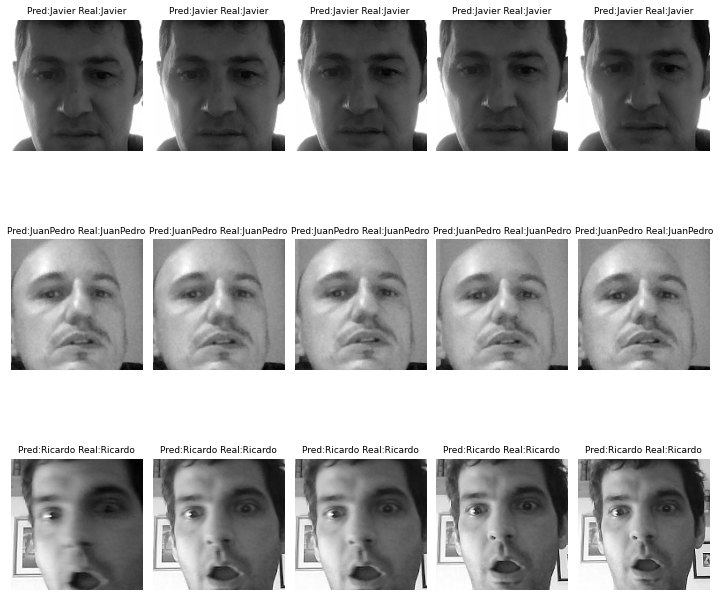

In [13]:
faces_sample=faces_data[:5]+faces_data[300:305]+faces_data[600:605]
pred_sample=faces_pred[:5] +faces_pred[300:305] +faces_pred[600:605]
labels_sample=labels[:5]+labels[300:305]+labels[600:605]

fig,axes=plt.subplots(3,5,figsize=(10,10))
i=0

axes=axes.flatten()
for img,pred_label,label,ax in zip(faces_sample,pred_sample,labels_sample,axes):
    ax.imshow(img,cmap='gray')
    ax.axis('off')
    pred=lista_gente[pred_label[0]]
    real=lista_gente[label]
    ax.set_title('Pred:{} Real:{}'.format(pred,real),fontsize=9)
    
plt.tight_layout()
plt.show()  

In [9]:
labels_pred=[i[0] for i in faces_pred]

In [10]:
cm=confusion_matrix(labels,labels_pred)

In [11]:
def plot_confusion_matrix(cm,clases,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(clases))
    plt.xticks(tick_marks,clases,rotation=45)
    plt.yticks(tick_marks,clases)
    
    umbral=cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>umbral else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

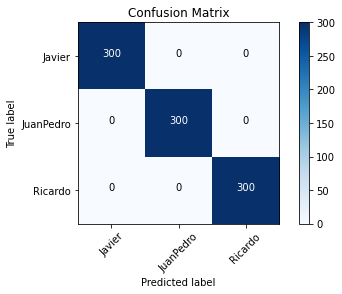

In [12]:
plot_confusion_matrix(cm,lista_gente)

* El modelo generado por EigenFace nos reconoce perfectamente sin ninguna equivocación en la matriz de confusión. Seguiremos avanzando con este modelo en nuestro objetivo de reconocedor de personas y emociones